In [1]:
from image_loader import ImageLoader, ImagePreprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import cv2
import matplotlib.pyplot as plt

In [2]:
img_size = (100, 100)
train_dir = "images/train/train"
test_dir = "images/test/test"
classes = {"cat": 0, "dog": 1}
SZ = img_size[0]

In [3]:
def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11'] / m['mu02']
    M = np.float32([[1, skew, -0.5 * SZ * skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return img


def load_images(n, img_dir, image_size, class_labels=None):
    data = []
    img_labels = []
    image_loader = ImageLoader(dir_name=img_dir)
    image_preprocessor = ImagePreprocessing(img_size=image_size)
    for i in range(n):
        img = image_loader.get_one_image(labels=class_labels, new_size=image_size)
        gray_scaled = image_loader.rgb2gray(img["data"])
        sobeled = image_loader.sobel_image(gray_scaled)
        deskewed = deskew(sobeled)
        hog = image_preprocessor.get_hog(deskewed)
        data.append(hog)
        img_labels.append(img["target"])
    return np.array(data), np.array(img_labels)

In [4]:
image_loader = ImageLoader(dir_name=train_dir)
image_preprocessor = ImagePreprocessing(img_size=img_size)

In [8]:
img = image_loader.get_one_image(labels=classes, new_size=img_size)
gray_scaled = image_loader.rgb2gray(img["data"])
sobeled = image_loader.sobel_image(gray_scaled)
deskewed = deskew(sobeled)

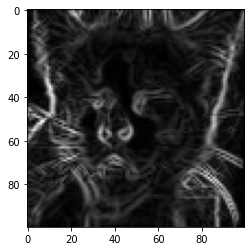

In [10]:
plt.imshow(deskewed, cmap="gray")

In [14]:
n_samples = 1000
hog_descriptors, labels = load_images(n_samples, image_size=img_size, class_labels=classes, img_dir=train_dir)
train_n = int(0.9 * len(hog_descriptors))
hog_descriptors_train, hog_descriptors_test = np.split(hog_descriptors, [train_n])
labels_train, labels_test = np.split(labels, [train_n])

In [15]:
model = SVC()
for i in range(1, 1100, 5):
    model.fit(hog_descriptors_train, labels_train)
    clf = make_pipeline(StandardScaler(), PCA(n_components=i), model)
    clf.fit(hog_descriptors_train, labels_train)
    print(f'Number of components: {i} \t Accuracy: {accuracy_score(clf.predict(hog_descriptors_test), labels_test)*100}')

Number of components: 1 	 Accuracy: 61.0
Number of components: 6 	 Accuracy: 62.0
Number of components: 11 	 Accuracy: 65.0
Number of components: 16 	 Accuracy: 65.0
Number of components: 21 	 Accuracy: 70.0
Number of components: 26 	 Accuracy: 70.0
Number of components: 31 	 Accuracy: 71.0
Number of components: 36 	 Accuracy: 73.0
Number of components: 41 	 Accuracy: 75.0
Number of components: 46 	 Accuracy: 71.0
Number of components: 51 	 Accuracy: 72.0
Number of components: 56 	 Accuracy: 73.0
Number of components: 61 	 Accuracy: 71.0
Number of components: 66 	 Accuracy: 72.0
Number of components: 71 	 Accuracy: 71.0
Number of components: 76 	 Accuracy: 69.0
Number of components: 81 	 Accuracy: 72.0
Number of components: 86 	 Accuracy: 70.0
Number of components: 91 	 Accuracy: 72.0
Number of components: 96 	 Accuracy: 71.0
Number of components: 101 	 Accuracy: 71.0
Number of components: 106 	 Accuracy: 69.0
Number of components: 111 	 Accuracy: 68.0
Number of components: 116 	 Accur

KeyboardInterrupt: 

In [16]:
def learn(n_epochs, n_samples, clf):
    for i in range(n_epochs):
        hog_descriptors, labels = load_images(n_samples, image_size=img_size, class_labels=classes, img_dir=train_dir)
        train_n = int(0.9 * len(hog_descriptors))
        hog_descriptors_train, hog_descriptors_test = np.split(hog_descriptors, [train_n])
        labels_train, labels_test = np.split(labels, [train_n])
        clf.fit(hog_descriptors_train, labels_train)
        print(f'epoch: {i} \t Accuracy: {accuracy_score(clf.predict(hog_descriptors_test), labels_test)*100}')
        del hog_descriptors, labels

In [17]:
model = SVC(C=10.5, gamma=0.5)
clf = make_pipeline(StandardScaler(), PCA(n_components=42), model)

In [18]:
learn(n_epochs=20, n_samples=1000, clf=clf)

epoch: 0 	 Accuracy: 48.0
epoch: 1 	 Accuracy: 48.0


KeyboardInterrupt: 